# Data Exploration, Cropping, and Splitting

## Libraries and Directories

In [1]:
import os
import cv2
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [2]:
input_dir ='/Users/ACER/Desktop/hpc_dataset/train_v0/'
train_dir = '/Users/ACER/Desktop/hpc_dataset/train/'
test_dir = '/Users/ACER/Desktop/hpc_dataset/test/'

cropped_train_dir = '/Users/ACER/Desktop/hpc_dataset/cropped_train/'
cropped_val_dir = '/Users/ACER/Desktop/hpc_dataset/cropped_val/'
cropped_test_dir = '/Users/ACER/Desktop/hpc_dataset/cropped_test/'

In [3]:
ORIGINAL_SIZE = 96
CROP_SIZE = 48

## Data Visualization: Cropping

In [4]:
def crop_img(img):
    
    start_crop = (ORIGINAL_SIZE - CROP_SIZE) // 2
    end_crop = start_crop + CROP_SIZE
    
    return img[start_crop:end_crop, start_crop:end_crop]

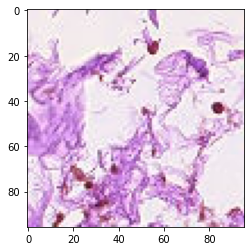

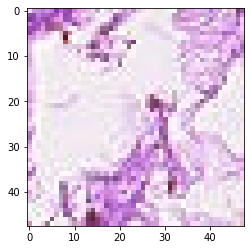

In [5]:
for img in os.listdir(input_dir):
    img_array = cv2.imread(os.path.join(input_dir,img))
    plt.imshow(img_array)
    plt.show()
    img_array = crop_img(img_array)
    plt.imshow(img_array)
    plt.show()
    break

## Generate Cropped Image

In [6]:
for img in tqdm(os.listdir(test_dir)):
    img_array = cv2.imread(os.path.join(test_dir,img))
    img_array = crop_img(img_array)
    cv2.imwrite(cropped_test_dir + img, img_array)

100%|████████████████████████████████████| 57458/57458 [12:04<00:00, 79.29it/s]


## Move image from class folder to all folder

In [6]:
## Move image from class folder to all folder

#for filename in os.listdir("/Users/ACER/Desktop/hpc_dataset/cropped_val/0/"):
#    if filename.endswith(".tif"):
#        shutil.move("/Users/ACER/Desktop/hpc_dataset/cropped_val/0/"+filename, cropped_train_dir)

#for filename in os.listdir("/Users/ACER/Desktop/hpc_dataset/cropped_val/1/"):
#    if filename.endswith(".tif"):
#        shutil.move("/Users/ACER/Desktop/hpc_dataset/cropped_val/1/"+filename, cropped_train_dir)

## Split files into folders according to their class

In [7]:
df = pd.read_csv('/Users/ACER/Desktop/hpc_dataset/train_labels.csv')
df['path'] = [str(cropped_train_dir)+str(x)+".tif" for x in tqdm(df['id'])]
df['image'] = [cv2.imread(x) for x in tqdm(df['path'])]

100%|█████████████████████████████████| 220025/220025 [22:15<00:00, 164.70it/s]


In [8]:
print(df.head())

                                         id  label  \
0  f38a6374c348f90b587e046aac6079959adf3835      0   
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1   
2  755db6279dae599ebb4d39a9123cce439965282d      0   
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0   
4  068aba587a4950175d04c680d38943fd488d6a9d      0   

                                                path  \
0  /Users/ACER/Desktop/hpc_dataset/cropped_train/...   
1  /Users/ACER/Desktop/hpc_dataset/cropped_train/...   
2  /Users/ACER/Desktop/hpc_dataset/cropped_train/...   
3  /Users/ACER/Desktop/hpc_dataset/cropped_train/...   
4  /Users/ACER/Desktop/hpc_dataset/cropped_train/...   

                                               image  
0  [[[247, 246, 248], [246, 245, 247], [245, 244,...  
1  [[[250, 248, 248], [253, 251, 251], [242, 242,...  
2  [[[205, 190, 222], [216, 201, 233], [202, 185,...  
3  [[[203, 136, 197], [163, 105, 170], [179, 123,...  
4  [[[77, 45, 80], [41, 1, 49], [114, 65, 127], [...  


In [20]:
train_df, val_df = train_test_split(df, test_size=0.2)

neg_train_samples = train_df[train_df.label == 0]
pos_train_samples = train_df[train_df.label == 1]

neg_val_samples = val_df[val_df.label == 0]
pos_val_samples = val_df[val_df.label == 1]

neg_train_samples = neg_train_samples.reset_index(drop=True)
pos_train_samples = pos_train_samples.reset_index(drop=True)

neg_val_samples = neg_val_samples.reset_index(drop=True)
pos_val_samples = pos_val_samples.reset_index(drop=True)


print("# Of Negative Training Samples : {}".format(len(neg_train_samples)))
print("# Of Positive Training Samples : {}".format(len(pos_train_samples)))
print("# Of Negative Validation Samples : {}".format(len(neg_val_samples)))
print("# Of Positive Validation Samples : {}".format(len(pos_val_samples)))

# Of Negative Training Samples : 104738
# Of Positive Training Samples : 71282
# Of Negative Validation Samples : 26170
# Of Positive Validation Samples : 17835


In [21]:
# Code here to move images into the appropriate directories as they start sitting in the train and test folders
# and need to be moved into train/0, train/1 and test/0, test/1

[shutil.move(x, cropped_train_dir + "0/") for x in neg_train_samples['path']]
[shutil.move(x, cropped_train_dir + "1/") for x in pos_train_samples['path']]
[shutil.move(x, cropped_val_dir + "0/") for x in neg_val_samples['path']]
[shutil.move(x, cropped_val_dir + "1/") for x in pos_val_samples['path']]

['/Users/ACER/Desktop/hpc_dataset/cropped_val/1/4136ddfeae5ea1c9a51dbf823c4f90bd0181acc7.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/fcdfcb5a923bee0549676ccca83152f2dcd9e6ba.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/741b6933dd84b3b3310a218fe5a34d0c71d7ef19.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/0ddf98c9f9bf28c5b8add9acdb3464347a616ea1.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/5cd5330cac69f0be0a194365ddecbce899b67db2.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/8b4972b12067ae0d13599bb1eddb795083a0404e.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/fc7426d1c464daeb8bb9f4683d48c229639553c1.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/3552e11b70ec2047d62d9866b2839dea921e7ab5.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/d1faf5b339c86a04f8ddc5d0331595885ab7126e.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/3a7e094cb474f4c5389ed96257c503de4bdec045.tif',
 '/Users/ACER/Desktop/hpc_dataset/cropped_val/1/c0